# 시계열 분석
시간의 흐름에 따른 데이터

### AR 모델
이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형. 자기 회귀 모델.  
p 시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형.  

### MA 모델
트렌드가 변화하는 상황에 적합한 회귀 모델. 이동 평균 모델.  
이전 데이터의 오차에서 현재 데이터의 상태르 추론하는 모델.  

### ARMA 모델
AR 모델과 MA 모델을 섞은 모델.  
자동 회귀 이동 평균 모델.  

### ARIMA 모델 ★
과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델.  

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")

In [34]:
def parser(x):
    return pd.datetime.strptime('199'+x, '%Y-%m')         # 날짜와 시간 정보를 문자열로 바꾸어 주는 메소드

series = pd.read_csv('C:/AI/sales.csv', header=0, parse_dates=[0], index_col=0,
                     squeeze=True, date_parser=parser)

In [35]:
series.head()

Month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
1991-04-01    119.3
1991-05-01    180.3
Name: Sales, dtype: float64

In [15]:
# model 생성
model = ARIMA(series, order=(5,1,0))      # 이전 5개를 가지고 1개를 예측한다.
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Fri, 18 Nov 2022   AIC                            408.699
Time:                        09:49:00   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.001       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     -2.365      0.018      -1.223      -0.114
ar.L3.D.Sales    -0.4426      0.297     -1.489      0.136      -1.025       0.140
ar.L4.D.Sales    -0.0495      0.288     -0.172      0.864      -0.614       0.515
ar.L5.D.Sales     0.1652      0.197      0.840      0.401      -0.220       0.551
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1401           -0.4612j            1.2298           -0.4388
AR.2           -1.1401           +0.4612j            1.2298            0.4388
AR.3            0.0222           -1.2562j            1.2564           -0.2472
AR.4            0.0222           +1.2562j            1.2564            0.2472
AR.5            2.5355           -0.0000j            2.5355           -0.0000
-----------------------------------------------------------------------------
"""

시간이 길어지면 학습이 잘 안된다..  
이를 보완하기 위한 것이 LSTM이다.  

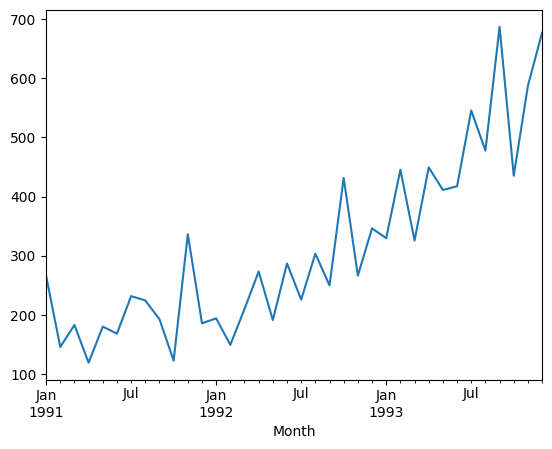

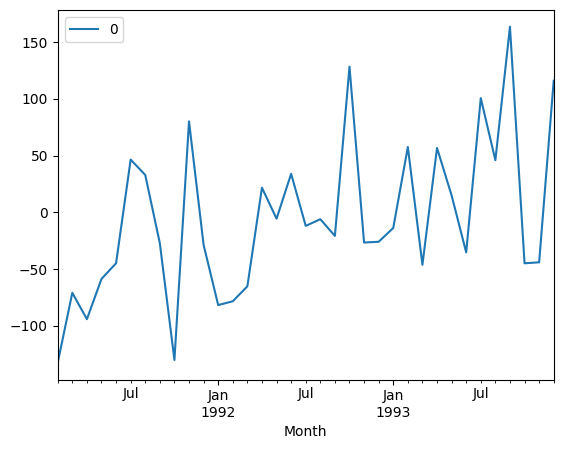

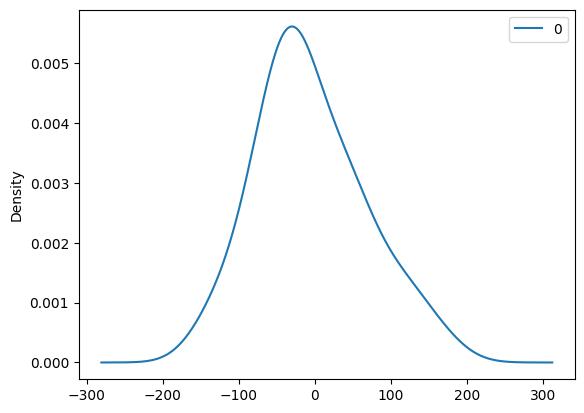

In [21]:
# 시각화
series.plot()                                  # 예제 분포 그래프

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()                               # 오차 그래프

residuals.plot(kind='kde')                     # 밀도 그래프

plt.show()

In [22]:
residuals.describe()

,0
count,35.000000
mean,-5.569257
std,70.272666
min,-132.525607
25%,-45.563773
50%,-20.763482
75%,39.933209
max,163.552196


predicted=354.377735, expected=346.300000
predicted=288.627362, expected=329.700000
predicted=382.818000, expected=445.400000
predicted=339.543947, expected=325.900000
predicted=392.897222, expected=449.300000
predicted=354.487951, expected=411.300000
predicted=452.200111, expected=417.400000
predicted=406.806115, expected=545.500000
predicted=430.162000, expected=477.600000
predicted=492.745332, expected=687.000000
predicted=493.604671, expected=435.300000
predicted=657.397175, expected=587.300000
predicted=522.091073, expected=676.900000
Test MSE:  8074.992


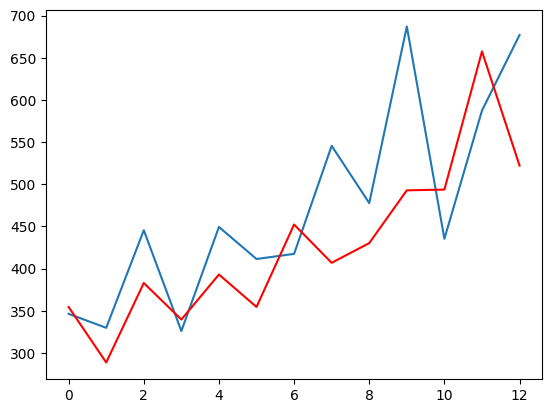

In [60]:
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]         # 66% / 34%
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))       # model 생성
    model_fit = model.fit(disp=0)               # 훈련
    output = model_fit.forecast()               # forecast로 예측
#    print('output : ', output)
    yhat = output[0]                            # output[0]:예측값 , output[2]:최대,최소
    predictions.append(yhat)
    obs = test[t]                               # 관측값
#    print('obs : ', obs)
    history.append(obs)                         # 마지막 5일(계속 갱신)을 보고 그 다음 하루 예측
    print('predicted=%f, expected=%f' % (yhat, obs))
# print(history)
error = mean_squared_error(test, predictions)
print('Test MSE: % .3f' % error)
plt.plot(test)
plt.plot(predictions, color='r')
plt.show()